# IMDB Movie Data

DESCRIPTION
Movie data from 2006 to 2016 from IMDB.

SUMMARY
A Summary Dataset from 2006 to 2016.

This is a summary dataset that contains all the data of IMDB from the year 2006 to 2016. The era where the greatest movies were made and what was the start of the Marvel Cinematic Universe and various other movies that went on to change the world.

https://data.world/promptcloud/imdb-data-from-2006-to-2016/workspace/project-summary?agentid=promptcloud&datasetid=imdb-data-from-2006-to-2016

## Multiple Linear Regression

Hypothesis: Can we predict the movie Revenue using the following variables Genre1, Genre2, Genre3, Ratings, Votes, Metascore, Runtime (Minutes)?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
 # Read the csv file into a pandas DataFrame
data = pd.read_csv("../Resources/data/IMDB-Movie-Data.csv")
data.head()

,Rank,Title,Genre,Genre1,Genre2,Genre3,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Adventure,Mystery,Sci-Fi,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Horror,Thriller,NaN,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",Animation,Comedy,Family,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",Action,Adventure,Fantasy,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
movie_df = data[['Genre1','Genre2','Genre3','Rating','Votes','Metascore','Runtime (Minutes)','Revenue (Millions)']]

In [4]:
movie_df = movie_df.dropna()
movie_df

,Genre1,Genre2,Genre3,Rating,Votes,Metascore,Runtime (Minutes),Revenue (Millions)
0,Action,Adventure,Sci-Fi,8.1,757074,76.0,121,333.13
1,Adventure,Mystery,Sci-Fi,7.0,485820,65.0,124,126.46
3,Animation,Comedy,Family,7.2,60545,59.0,108,270.32
4,Action,Adventure,Fantasy,6.2,393727,40.0,123,325.02
5,Action,Adventure,Fantasy,6.1,56036,42.0,103,45.13
...,...,...,...,...,...,...,...,...
990,Action,Adventure,Fantasy,6.6,129708,44.0,92,45.80
991,Drama,Family,Music,8.5,102697,42.0,165,1.20
993,Action,Adventure,Horror,5.9,140900,37.0,97,60.13
997,Drama,Music,Romance,6.2,70699,50.0,98,58.01


In [5]:
# X Values df
new_movie_df = movie_df[['Genre1','Genre2','Genre3','Rating','Votes','Metascore','Runtime (Minutes)']]

In [6]:
new_movie_df.dtypes

Genre1                object
Genre2                object
Genre3                object
Rating               float64
Votes                  int64
Metascore            float64
Runtime (Minutes)      int64
dtype: object

In [7]:
data['Genre1'].value_counts()

Action       293
Drama        195
Comedy       175
Adventure     75
Crime         71
Biography     64
Animation     49
Horror        46
Mystery       13
Thriller      10
Fantasy        4
Sci-Fi         3
Romance        2
Name: Genre1, dtype: int64

In [8]:
# Assign the data to X
X = pd.get_dummies(data=new_movie_df,columns=['Genre1','Genre2','Genre3'])
X

,Rating,Votes,Metascore,Runtime (Minutes),Genre1_Action,Genre1_Adventure,Genre1_Animation,Genre1_Biography,Genre1_Comedy,Genre1_Crime,...,Genre3_Horror,Genre3_Music,Genre3_Musical,Genre3_Mystery,Genre3_Romance,Genre3_Sci-Fi,Genre3_Sport,Genre3_Thriller,Genre3_War,Genre3_Western
0,8.1,757074,76.0,121,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,7.0,485820,65.0,124,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.2,60545,59.0,108,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.2,393727,40.0,123,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6.1,56036,42.0,103,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,6.6,129708,44.0,92,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,8.5,102697,42.0,165,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
993,5.9,140900,37.0,97,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
997,6.2,70699,50.0,98,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
# Assign the data to y (47 Variables which are going to predict the Revenue)
y = movie_df["Revenue (Millions)"].values.reshape(-1, 1)
print(X.shape, y.shape)

(580, 47) (580, 1)


In [10]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5954017481467735
Testing Score: 0.40105589007378395


Text(0.5, 1.0, 'Residual Plot')

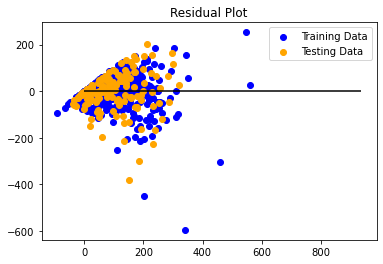

In [13]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


## Neural Network